In [56]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
import  matplotlib.pyplot as plt
import random

In [57]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train/255.#float
x_test=x_test/255.
x_train=np.reshape(x_train,(-1,28,28,1))
x_test=np.reshape(x_test,(-1,28,28,1))

In [58]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [59]:
model=Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(16,(5,5),activation='relu'),
    layers.MaxPool2D((2,2),padding='same'),
    layers.Conv2D(8,(3,3),activation='relu'),
    layers.MaxPool2D((2,2),padding='same'),
    layers.Conv2D(8,(3,3),activation="relu",padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(16,(5,5),activation='relu',padding='same'),
    layers.UpSampling2D((3,3)),
    layers.Conv2D(1,(3,3),activation='sigmoid')
 
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 8)           584       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 10, 10, 8)       

In [60]:
 model.compile(optimizer='adam', loss='binary_crossentropy')
 model.fit(x_train_noisy,x_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.2078
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1520
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1443
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1403
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1375


1/1 [==============================] - 0s 18ms/step


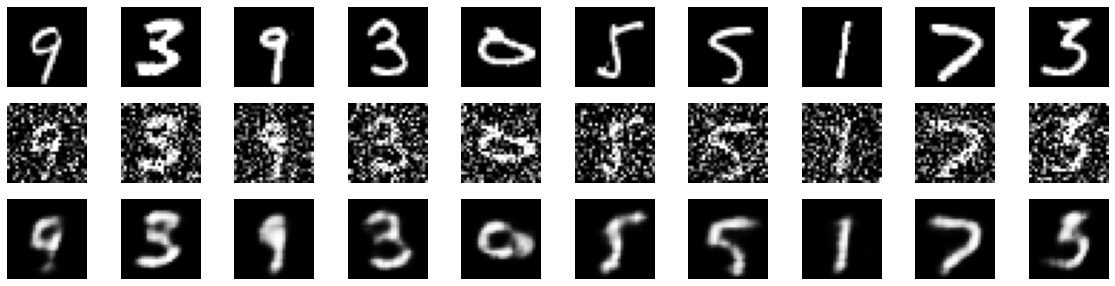

In [62]:
n1 = random.choices(range(len(x_test)),k=10)
predict_img=model.predict(x_test_noisy[n1])
plt.figure(figsize=(20, 5))
for i in range(1, n + 1):
    # Display original
    plt.subplot(3, n, i)
    plt.axis("off")
    plt.imshow(x_test[n1[i-1]].reshape(28, 28),"gray")
    # Display noisy
    plt.subplot(3, n, i+n)
    plt.axis("off")
    plt.imshow(x_test_noisy[n1[i-1]].reshape(28, 28))
    # Display reconstruction
    plt.subplot(3, n, i + 2*n)
    plt.axis("off")
    plt.imshow(predict_img[i-1].reshape(28, 28))    
plt.show()